<a href="https://colab.research.google.com/github/fortune-max/M4-python-refresher-ml/blob/main/Copy_of_Copy_of_Day_9_Images_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.augmentedstartups.com/blog/the-best-object-detection-methods-for-2023-a-comprehensive-guide#:~:text=In%20conclusion%2C%20YOLOv7%20is%20the,CNN%2C%20HOG%2C%20and%20SSD.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

!cp gdrive/MyDrive/DS404/DS404_Classwork/Day_2_Materials/imports.py .
!cp gdrive/MyDrive/DS404/DS404_Classwork/Day_9_Materials/* .
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'Copy of apple.jpeg'		 'Copy of book_page.png'  'Copy of ML_folks.jpg'   imports.py
'Copy of bcn_manifestation.jpg'  'Copy of count.wav'	   gdrive		   sample_data


In [ ]:

import matplotlib.pyplot as plt
import cv2
%matplotlib inline

### Working with images with OpenCV

https://docs.opencv.org/4.x/d1/dfb/intro.html

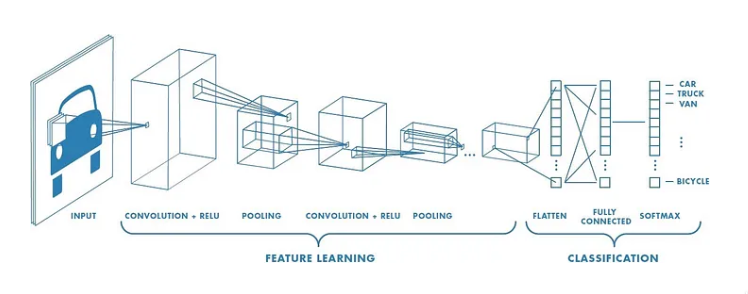

In [ ]:
!cp apple.jpeg /usr/local/share/jupyter/nbextensions/google.colab/

![Apple](/usr/local/share/jupyter/nbextensions/google.colab/apple.jpeg)

In [ ]:
im = cv2.imread('Copy of apple.jpeg')

In [ ]:
im

array([[[ 89,  74,  82],
        [ 88,  73,  81],
        [ 87,  72,  80],
        ...,
        [  2,   1,   3],
        [  1,   0,   2],
        [  1,   0,   2]],

       [[ 88,  73,  81],
        [ 88,  73,  81],
        [ 87,  72,  80],
        ...,
        [  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   2]],

       [[ 88,  71,  80],
        [ 88,  71,  80],
        [ 88,  72,  79],
        ...,
        [  1,   0,   2],
        [  1,   0,   2],
        [  1,   0,   2]],

       ...,

       [[106,  32,   4],
        [107,  33,   5],
        [109,  32,   5],
        ...,
        [ 43,  68, 108],
        [ 43,  68, 108],
        [ 43,  68, 108]],

       [[ 85,  16,   0],
        [ 87,  18,   1],
        [ 90,  20,   3],
        ...,
        [ 42,  67, 107],
        [ 43,  68, 108],
        [ 44,  69, 109]],

       [[ 60,   3,   0],
        [ 62,   5,   0],
        [ 68,   9,   0],
        ...,
        [ 38,  64, 104],
        [ 39,  65, 105],
        [ 40,  66, 106]]

In [ ]:
type(im)

numpy.ndarray

In [ ]:
import numpy as np
np.apply_along_axis(np.mean, 2, im)

array([[81.66666667, 80.66666667, 79.66666667, ...,  2.        ,
         1.        ,  1.        ],
       [80.66666667, 80.66666667, 79.66666667, ...,  1.        ,
         1.        ,  1.        ],
       [79.66666667, 79.66666667, 79.66666667, ...,  1.        ,
         1.        ,  1.        ],
       ...,
       [47.33333333, 48.33333333, 48.66666667, ..., 73.        ,
        73.        , 73.        ],
       [33.66666667, 35.33333333, 37.66666667, ..., 72.        ,
        73.        , 74.        ],
       [21.        , 22.33333333, 25.66666667, ..., 68.66666667,
        69.66666667, 70.66666667]])

In [ ]:
np.apply_over_axes(np.mean, im, (0,1))

array([[[ 86.35499409,  87.39348035, 108.4512042 ]]])

In [ ]:
im.shape

(423, 640, 3)

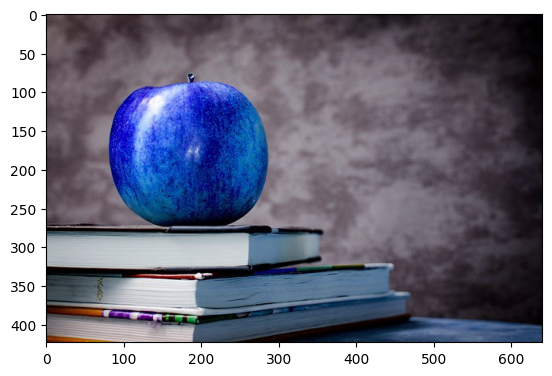

In [ ]:
plt.imshow(im)

In [ ]:
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

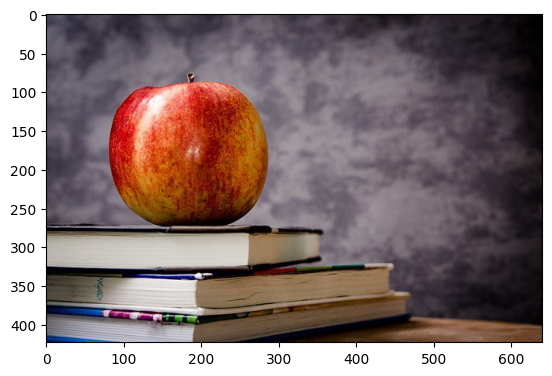

In [ ]:
plt.imshow(im)

In [ ]:
np.apply_over_axes(np.mean, im, (0,1))

array([[[108.4512042 ,  87.39348035,  86.35499409]]])

In [ ]:
!pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 59.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046369 sha256=aa02123919f82bfa2ab7ceada42b589f6a10c844243fe91d505e46ef74e1ca70
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12067 sha256=de85e3881b6662b3fed8262a2a201df47a4d87542f43dfcd05a990dd73589b42
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [ ]:
import cvlib

In [ ]:
pip install --upgrade cvlib


In [ ]:
import os

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
os.environ['DISABLE_COLAB_TF_IMPORT_HOOK'] = '1'
bbox, label, conf = cvlib.detect_common_objects(im)


error: ignored

In [ ]:
bbox

[[2, 275, 358, 332], [-2, 337, 468, 414], [83, 78, 282, 276]]

In [ ]:
label

['book', 'book', 'apple']

In [ ]:
conf

[0.914857804775238, 0.8776932954788208, 0.7798632979393005]

In [ ]:
out_im = np.array(im)

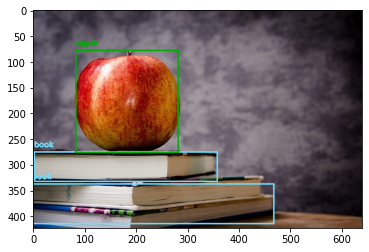

In [ ]:
output_image = cvlib.object_detection.draw_bbox(out_im, bbox, label, conf)
plt.imshow(output_image)

In [ ]:
one_bbox = bbox[-1]
one_bbox

[83, 78, 282, 276]

In [ ]:
box_coordinates = np.array(one_bbox).reshape( (2,2) ).transpose()
box_coordinates

array([[ 83, 282],
       [ 78, 276]])

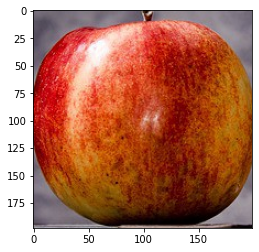

In [ ]:
subimage = im[ one_bbox[1]:one_bbox[3], one_bbox[0]:one_bbox[2]]
plt.imshow(subimage)

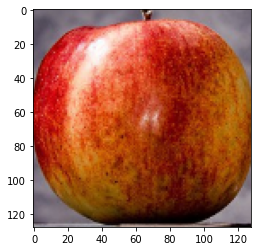

In [ ]:
resized_image = cv2.resize(subimage, (128,128))
plt.imshow(resized_image)

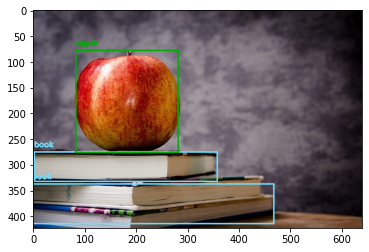

In [ ]:
plt.imshow(out_im)

In [ ]:
plt.imsave('apple_processed.png', out_im)

In [ ]:
cv2.imwrite('apple_processed.png', im)

True

![Apple processed](apple_processed.png)

### PIL

In [ ]:
!pip install Pillow==7.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-7.0.0-cp38-cp38-manylinux1_x86_64.whl (2.1 MB)
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.0.0
    Uninstalling Pillow-9.0.0:
      Successfully uninstalled Pillow-9.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytesseract 0.3.10 requires Pillow>=8.0.0, but you have pillow 7.0.0 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 7.0.0 which is incompatible.


In [ ]:
from PIL import Image

https://pypi.org/project/Pillow/

### Face Recognition

In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 21 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=4d54703ffa898e326b45b02d2ead7aa7cc9460a07431bb62995fea10b6a1a00e
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


In [ ]:
import face_recognition

https://pypi.org/project/face-recognition/

![ML folks](ML_folks.jpg)

In [ ]:
im = cv2.imread("ML_folks.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

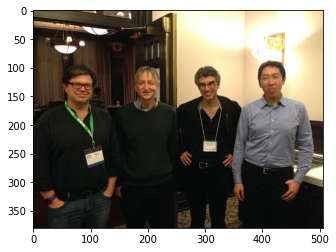

In [ ]:
plt.imshow(im)

In [ ]:
face_locations = face_recognition.face_locations(im)

In [ ]:
face_locations

[(118, 213, 154, 177),
 (106, 433, 142, 397),
 (118, 108, 161, 64),
 (118, 321, 154, 285)]

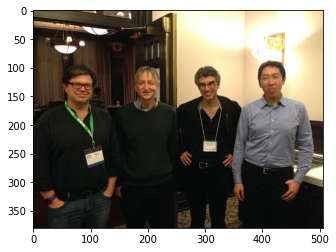

In [ ]:
plt.imshow(im)

In [ ]:
one_bbox = face_locations[1]

In [ ]:
one_bbox

(106, 433, 142, 397)

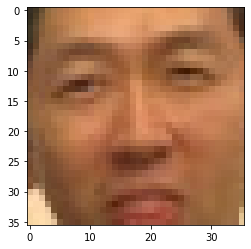

In [ ]:
subimage = im[ one_bbox[0]:one_bbox[2],one_bbox[3]:one_bbox[1]]
plt.imshow(subimage)

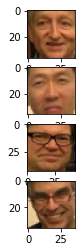

In [ ]:
for i,one_bbox in enumerate(face_locations):
    subimage = im[one_bbox[0]:one_bbox[2],  one_bbox[3]:one_bbox[1]]
    plt.subplot(len(face_locations),1,i+1)
    plt.imshow(subimage)

In [ ]:
im = cv2.imread('bcn_manifestation.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

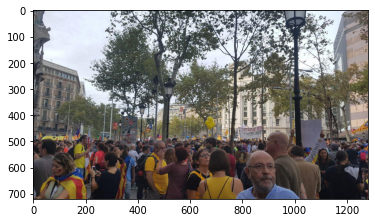

In [ ]:
plt.imshow(im)

In [ ]:
face_locations = face_recognition.face_locations(im)

In [ ]:
face_locations

[(570, 939, 677, 832), (538, 1129, 574, 1093), (539, 688, 591, 636)]

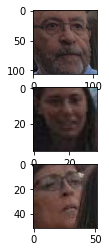

In [ ]:
for i,one_bbox in enumerate(face_locations):
    subimage = im[one_bbox[0]:one_bbox[2],  one_bbox[3]:one_bbox[1]]
    print()
    plt.subplot(len(face_locations),1,i+1)
    plt.imshow(subimage)

In [ ]:
len(face_recognition.face_encodings(im, known_face_locations= face_locations))

3

In [ ]:
face_encodings = face_recognition\
    .face_encodings(im, face_locations, 3)

In [ ]:
len(face_encodings)

3

In [ ]:
face_encodings[0]

array([-0.09961786,  0.04321229,  0.07307976, -0.05681629, -0.07120959,
       -0.11905452, -0.01343783, -0.02174634,  0.16317436, -0.05000082,
        0.16258584,  0.00805159, -0.19652574,  0.04269297,  0.05015512,
        0.12938267, -0.18399435, -0.03864382, -0.1577898 , -0.02261483,
       -0.03935077, -0.00063731,  0.07545342,  0.02374681, -0.03077544,
       -0.36362609, -0.11033251, -0.1037946 ,  0.09740222, -0.03667804,
        0.06094604, -0.03343271, -0.1782314 , -0.09699838,  0.03251305,
        0.04379946, -0.0765466 , -0.09436241,  0.24112734,  0.04851721,
       -0.17172271,  0.04520865,  0.03006575,  0.22920059,  0.18882966,
        0.03442727,  0.06244566, -0.03778415,  0.08051126, -0.23063952,
        0.09607153,  0.06971532,  0.14230928,  0.04946682,  0.15219454,
       -0.14903273,  0.12378302,  0.11749177, -0.18679294,  0.11181786,
        0.10748001, -0.12352221,  0.00364   ,  0.02699515,  0.13333958,
        0.05463719, -0.02390465, -0.10291275,  0.07055514, -0.11

In [ ]:
face_encodings[0].shape

(128,)

## OCR
https://pypi.org/project/pytesseract/

In [ ]:
!pip install pytesseract


In [ ]:
!pip install tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=c093ca61b0aef7ff7f203d9ebbe796b7eab039ff25e8e2b4f6b4adf2ff19ef25
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [ ]:
import pytesseract

![Book Page](book_page.png)

In [ ]:
im = cv2.imread('Copy of book_page.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

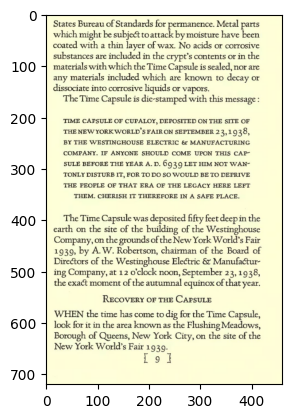

In [ ]:
plt.imshow(im)

In [ ]:
osd = pytesseract.image_to_osd(im)

TesseractNotFoundError: ignored

In [ ]:
osd

In [ ]:
text = pytesseract.image_to_string(im)

AttributeError: ignored

In [ ]:
text

NameError: ignored

### ImageAI

https://imageai.readthedocs.io/en/latest/

In [ ]:

!pip install imageai keras tensorflow.keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 1.6 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement tensorflow.keras (from versions: none)
ERROR: No matching distribution found for tensorflow.keras


In [ ]:
from imageai.Detection import ObjectDetection
detector = ObjectDetection()

ModuleNotFoundError: ignored

In [ ]:
!wget https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/yolo-tiny.h5

In [ ]:
!cp yolo-tiny.h5

In [ ]:
detector.setModelTypeAsTinyYOLOv3()

In [ ]:
detector.setModelPath("yolo-tiny.h5 ")

In [ ]:
detector.loadModel()

In [ ]:
detection = detector.detectObjectsFromImage(input_image= "apple.jpeg",
                                    output_image_path="apple_processed.jpeg")

In [ ]:
for eachItem in detection:
    print(eachItem['box_points'])
    print(eachItem["name"] , " : ", eachItem["percentage_probability"])
